## 11.9. Adadelta

### 11.9.2. 代码实现

In [1]:
%matplotlib inline
import mindspore
from d2l import mindspore as d2l


def init_adadelta_states(feature_dim):
    s_w, s_b = d2l.zeros((feature_dim, 1)), d2l.zeros(1)
    delta_w, delta_b = d2l.zeros((feature_dim, 1)), d2l.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, grads, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta), grad in zip(params, states, grads):
        s[:] = rho * s + (1 - rho) * d2l.square(grad)
        g = (d2l.sqrt(delta + eps) / d2l.sqrt(s + eps)) * grad
        mindspore.ops.assign_sub(p, g)
        delta[:] = rho * delta + (1 - rho) * g * g

loss: 0.245, 0.125 sec/epoch


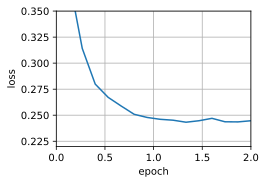

In [2]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim),
               {'rho': 0.9}, data_iter, feature_dim);

loss: 0.243, 0.075 sec/epoch


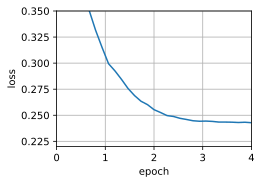

In [3]:
trainer = mindspore.nn.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)